# Getting a first look at your data

In [1]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv('data/nls97.csv')
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])

In [3]:
nls97.personid.count() == nls97.personid.nunique()

True

In [4]:
nls97.set_index('personid', inplace=True)

In [6]:
nls97.shape

(8984, 88)

In [7]:
nls97.index.nunique()

8984

In [8]:
nls97.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      6710 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 1

In [10]:
# T means transpose
nls97.head(2).T

personid,100061,100139
gender,Female,Male
birthmonth,5,9
birthyear,1980,1983
highestgradecompleted,13.0,12.0
maritalstatus,Married,Married
...,...,...
colenroct15,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled


In [11]:
covidtotals.set_index("iso_code", inplace=True)
covidtotals.index

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       ...
       'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=210)

In [12]:
covidtotals.shape

(210, 11)

In [14]:
covidtotals.index.nunique()

210

In [15]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         210 non-null    datetime64[ns]
 1   location         210 non-null    object        
 2   total_cases      210 non-null    int64         
 3   total_deaths     210 non-null    int64         
 4   total_cases_pm   209 non-null    float64       
 5   total_deaths_pm  209 non-null    float64       
 6   population       210 non-null    float64       
 7   pop_density      198 non-null    float64       
 8   median_age       186 non-null    float64       
 9   gdp_per_capita   182 non-null    float64       
 10  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 27.8+ KB


In [16]:
# show a sample of a few rows
# random_state -> seed
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


# Selecting and organizing columns

In [21]:
# Covert all the data object to category
nls97.loc[:, nls97.dtypes == 'object'] = nls97.select_dtypes(['object']).apply(
    lambda x: x.astype('category')
)

In [23]:
nls97.dtypes

gender                   category
birthmonth                  int64
birthyear                   int64
highestgradecompleted     float64
maritalstatus            category
                           ...   
colenroct15              category
colenrfeb16              category
colenroct16              category
colenrfeb17              category
colenroct17              category
Length: 88, dtype: object

In [26]:
# Select one or more columns using filter
analysiswork = nls97.filter(like="weeksworked")
analysiswork.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeksworked00  8603 non-null   float64
 1   weeksworked01  8564 non-null   float64
 2   weeksworked02  8556 non-null   float64
 3   weeksworked03  8490 non-null   float64
 4   weeksworked04  8458 non-null   float64
 5   weeksworked05  8403 non-null   float64
 6   weeksworked06  8340 non-null   float64
 7   weeksworked07  8272 non-null   float64
 8   weeksworked08  8186 non-null   float64
 9   weeksworked09  8146 non-null   float64
 10  weeksworked10  8054 non-null   float64
 11  weeksworked11  7968 non-null   float64
 12  weeksworked12  7747 non-null   float64
 13  weeksworked13  7680 non-null   float64
 14  weeksworked14  7612 non-null   float64
 15  weeksworked15  7389 non-null   float64
 16  weeksworked16  7068 non-null   float64
 17  weeksworked17  6670 non-null   float64
dtypes

In [27]:
analysiscats = nls97.select_dtypes(include=["category"])
analysiscats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   weeklyhrscomputer      6710 non-null   category
 3   weeklyhrstv            6711 non-null   category
 4   highestdegree          8953 non-null   category
 5   govprovidejobs         1833 non-null   category
 6   govpricecontrols       1859 non-null   category
 7   govhealthcare          1874 non-null   category
 8   govelderliving         1872 non-null   category
 9   govindhelp             1815 non-null   category
 10  govunemp               1811 non-null   category
 11  govincomediff          1775 non-null   category
 12  govcollegefinance      1875 non-null   category
 13  govdecenthousing       1847 non-null   category
 14  govprotectenvironment  1860 non-n

In [29]:
analysisnumber = nls97.select_dtypes(include=["number"])
analysisnumber.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   birthmonth             8984 non-null   int64  
 1   birthyear              8984 non-null   int64  
 2   highestgradecompleted  6663 non-null   float64
 3   childathome            4791 non-null   float64
 4   childnotathome         4791 non-null   float64
 5   wageincome             5091 non-null   float64
 6   nightlyhrssleep        6706 non-null   float64
 7   satverbal              1406 non-null   float64
 8   satmath                1407 non-null   float64
 9   gpaoverall             6004 non-null   float64
 10  gpaenglish             5798 non-null   float64
 11  gpamath                5766 non-null   float64
 12  gpascience             5684 non-null   float64
 13  weeksworked00          8603 non-null   float64
 14  weeksworked01          8564 non-null   float64
 1

# Generating frequencies for categorical variables
*"90% what we're going to find, we'll see in the frequency distribution"*

In [33]:
catcols = nls97.select_dtypes(include=["category"]).columns
catcols

Index(['gender', 'maritalstatus', 'weeklyhrscomputer', 'weeklyhrstv',
       'highestdegree', 'govprovidejobs', 'govpricecontrols', 'govhealthcare',
       'govelderliving', 'govindhelp', 'govunemp', 'govincomediff',
       'govcollegefinance', 'govdecenthousing', 'govprotectenvironment',
       'colenrfeb97', 'colenroct97', 'colenrfeb98', 'colenroct98',
       'colenrfeb99', 'colenroct99', 'colenrfeb00', 'colenroct00',
       'colenrfeb01', 'colenroct01', 'colenrfeb02', 'colenroct02',
       'colenrfeb03', 'colenroct03', 'colenrfeb04', 'colenroct04',
       'colenrfeb05', 'colenroct05', 'colenrfeb06', 'colenroct06',
       'colenrfeb07', 'colenroct07', 'colenrfeb08', 'colenroct08',
       'colenrfeb09', 'colenroct09', 'colenrfeb10', 'colenroct10',
       'colenrfeb11', 'colenroct11', 'colenrfeb12', 'colenroct12',
       'colenrfeb13', 'colenroct13', 'colenrfeb14', 'colenroct14',
       'colenrfeb15', 'colenroct15', 'colenrfeb16', 'colenroct16',
       'colenrfeb17', 'colenroct17'],
  

In [34]:
nls97[catcols].isnull().sum()


gender                      0
maritalstatus            2312
weeklyhrscomputer        2274
weeklyhrstv              2273
highestdegree              31
govprovidejobs           7151
govpricecontrols         7125
govhealthcare            7110
govelderliving           7112
govindhelp               7169
govunemp                 7173
govincomediff            7209
govcollegefinance        7109
govdecenthousing         7137
govprotectenvironment    7124
colenrfeb97              7734
colenroct97               483
colenrfeb98               483
colenroct98                96
colenrfeb99               119
colenroct99               133
colenrfeb00               164
colenroct00               179
colenrfeb01               198
colenroct01               226
colenrfeb02               252
colenroct02               286
colenrfeb03               326
colenroct03               362
colenrfeb04               406
colenroct04               438
colenrfeb05               476
colenroct05               513
colenrfeb0

In [37]:
# show frequencies
nls97.maritalstatus.value_counts()

Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [ ]:
nls97.maritalstatus.value_counts(sort=False)

In [39]:
nls97.maritalstatus.value_counts(sort=False, normalize=True)


Divorced         0.099371
Married          0.459532
Never-married    0.414568
Separated        0.023082
Widowed          0.003447
Name: maritalstatus, dtype: float64

In [42]:
nls97.filter(like='gov')

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
personid,,,,,,,,,,
100061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
999291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
nls97[nls97.maritalstatus == 'Married'].filter(like='gov').apply(pd.Series.value_counts, normalize=True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.173315,0.459864,0.564450,0.632293,0.372549,0.147265,0.258890,0.695418,0.356354,0.644505
2. Probably,0.328748,0.380952,0.359566,0.310719,0.445378,0.395512,0.273115,0.261456,0.493094,0.313433
3. Probably not,0.314993,0.112925,0.051560,0.037992,0.142857,0.328191,0.284495,0.033693,0.120166,0.028494
4. Definitely not,0.182944,0.046259,0.024423,0.018996,0.039216,0.129032,0.183499,0.009434,0.030387,0.013569


In [48]:
# Find frequencies and save to file
freqout = open('views/frequencies.txt', 'w')

for col in nls97.select_dtypes(include=["category"]):
    print(col, "----------------", "frequencies",
          nls97[col].value_counts(sort=False), "percentages",
          nls97[col].value_counts(sort=False, normalize=True),
          sep='\n\n', end='\n\n', file=freqout)
freqout.close()

# Generating summary statistics for continous variables

In [12]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)
covidtotals

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN
...,...,...,...,...,...,...,...,...,...,...,...
VNM,2020-06-01,Vietnam,328,0,3.370,0.000,97338583.0,308.127,32.6,6171.884,2.60
ESH,2020-06-01,Western Sahara,23,1,38.505,1.674,597330.0,NaN,28.4,NaN,NaN
YEM,2020-06-01,Yemen,323,80,10.829,2.682,29825968.0,53.508,20.3,1479.147,0.70


In [4]:
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
covidtotals.describe()



,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,210.00,210.00,209.00,209.00,210.00,198.00,186.00,182.00,164.00
mean,"29,216.14","1,770.71","1,361.84",55.93,"36,942,762.36",362.87,30.63,"19,539.15",3.01
std,"136,397.80","8,705.57","2,629.89",145.08,"142,509,205.13","1,581.44",9.13,"19,862.35",2.46
min,0.00,0.00,0.89,0.00,809.00,0.14,15.10,661.24,0.10
25%,175.75,4.00,96.78,0.89,"1,031,042.50",37.42,22.25,"4,485.33",1.30
50%,"1,242.50",25.50,282.00,6.21,"6,909,866.00",87.25,30.25,"13,183.08",2.36
75%,"10,117.00",241.25,"1,803.32",32.16,"26,158,676.50",214.12,39.00,"28,556.53",3.90
max,"1,790,191.00","104,383.00","19,771.35","1,237.55","1,439,323,774.00","19,347.50",48.20,"116,935.60",13.80


In [9]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         210 non-null    datetime64[ns]
 1   location         210 non-null    object        
 2   total_cases      210 non-null    int64         
 3   total_deaths     210 non-null    int64         
 4   total_cases_pm   209 non-null    float64       
 5   total_deaths_pm  209 non-null    float64       
 6   population       210 non-null    float64       
 7   pop_density      198 non-null    float64       
 8   median_age       186 non-null    float64       
 9   gdp_per_capita   182 non-null    float64       
 10  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 19.7+ KB


In [10]:
covidtotals.quantile(np.arange(0, 1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0.00,0.00,0.00,0.89,0.00,809.00,0.14,15.10,661.24,0.10
0.10,22.90,0.00,18.49,0.00,"84,255.30",15.28,18.70,"1,705.78",0.70
0.20,105.20,2.00,56.74,0.40,"552,898.80",25.08,20.30,"3,419.58",1.08
0.30,302.00,6.70,118.23,1.73,"2,045,651.80",46.33,24.65,"6,187.09",1.40
0.40,762.00,12.00,214.92,3.97,"4,297,086.00",69.60,28.10,"8,740.19",1.92
0.50,"1,242.50",25.50,282.00,6.21,"6,909,866.00",87.25,30.25,"13,183.08",2.36
0.60,"2,514.60",54.60,546.05,12.56,"10,764,550.80",112.39,32.60,"16,884.85",2.90
0.70,"6,959.80",137.20,"1,074.03",26.06,"18,501,781.30",194.14,37.50,"24,732.48",3.60
0.80,"16,847.20",323.20,"2,208.74",50.29,"33,071,316.60",262.73,41.00,"34,890.21",4.50
0.90,"46,513.10","1,616.90","3,772.00",139.53,"65,534,761.20",441.27,43.05,"46,378.33",6.20


<function matplotlib.pyplot.show(close=None, block=None)>

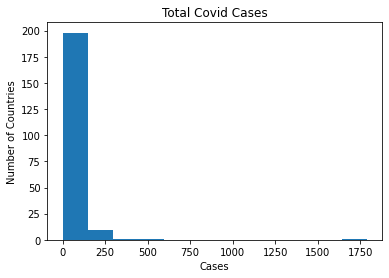

In [13]:
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases")
plt.xlabel("Cases")
plt.ylabel("Number of Countries")
plt.show

# Missing Values and Outliers